adult_apr6.csv and adult_nofs_fs_apr9.csv are adult data results using all the feature selection functions and no feature seletion and feature selection from sklearn, we can merge the two have full result csv file.


adult_reconn_apr6.csv and adult_recon_nofs_fs_apr9.csv are adult reconstruction data results using all the feature selection functions and no feature seletion and feature selection from sklearn, we can merge the two have full result csv file.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

In [5]:
adult_data = pd.read_csv("adult_apr6.csv", na_values='model_failed')
adult_data.drop('Unnamed: 0', axis = 1, inplace = True)

adult_data.head()

,data,features_cat,features_num,protected_attributes,p_att_description,target,etas,all_targets,feat_dictionary,feature_bins,...,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,positive_predictive_value,negative_predictive_value,accuracy,selected_features,mixa,mixy,eta
0,<__main__.NamedDataset object at 0x7f76b6b439d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,[20],['income-per-year'],"{'hours-per-week': 5, 'capital-gain': 5, 'capi...","{'workclass': 7, 'relationship': 6, 'occupatio...",...,-0.065068,-0.031267,0.032534,0.734861,0.795302,0.789858,"filtered_age_bins,capital-loss,capital-gain,oc...",0.129834,0.112680,NaN
1,<__main__.NamedDataset object at 0x7f76b6b439d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('marital-status', ['Married-civ-spouse'])",income-per-year,[20],['income-per-year'],"{'hours-per-week': 5, 'capital-gain': 5, 'capi...","{'workclass': 7, 'relationship': 6, 'occupatio...",...,-0.086938,0.071352,0.047682,0.734861,0.795302,0.789858,"filtered_marital-status,capital-gain,education...",0.102434,0.112680,NaN
2,<__main__.NamedDataset object at 0x7f76b6b439d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('race', ['White'])",income-per-year,[20],['income-per-year'],"{'hours-per-week': 5, 'capital-gain': 5, 'capi...","{'workclass': 7, 'relationship': 6, 'occupatio...",...,-0.043438,-0.026599,0.021719,0.727490,0.795971,0.789637,"filtered_race,capital-gain,capital-loss,relati...",0.034212,0.189796,NaN
3,<__main__.NamedDataset object at 0x7f76b6b439d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('sex', [1])",income-per-year,[20],['income-per-year'],"{'hours-per-week': 5, 'capital-gain': 5, 'capi...","{'workclass': 7, 'relationship': 6, 'occupatio...",...,-0.063295,-0.006819,0.031647,0.705512,0.794340,0.786025,"filtered_sex,capital-gain,education,capital-lo...",0.036333,0.103535,NaN
4,<__main__.NamedDataset object at 0x7f76b6b439d0>,"['workclass', 'relationship', 'occupation', 'e...","['hours-per-week', 'capital-gain', 'capital-lo...","['sex', 'race', 'age_bins', 'marital-status']","('age_bins', ['(38.9, 46.2]', '(46.2, 53.5]', ...",income-per-year,[20],['income-per-year'],"{'hours-per-week': 5, 'capital-gain': 5, 'capi...","{'workclass': 7, 'relationship': 6, 'occupatio...",...,-0.044758,0.010337,0.005440,0.844630,0.799096,0.802314,"['filtered_age_bins', 'capital-loss', 'capital...",0.129834,0.112680,NaN


In [7]:
adult_data.columns

Index(['data', 'features_cat', 'features_num', 'protected_attributes',
       'p_att_description', 'target', 'etas', 'all_targets', 'feat_dictionary',
       'feature_bins', 'greater', 'k', 'technique', 'model', 'dir_name',
       'model_type', 'disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'average_abs_odds_difference',
       'positive_predictive_value', 'negative_predictive_value', 'accuracy',
       'selected_features', 'mixa', 'mixy', 'eta'],
      dtype='object')

In [13]:
type(adult_data[['disparate_impact', 'statistical_parity_difference']])

pandas.core.frame.DataFrame

In [14]:
# mixa and fairness metrics
# mixy and accuracy

new_df = adult_data[['disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'average_abs_odds_difference',
       'positive_predictive_value', 'negative_predictive_value', 'accuracy',
       'selected_features', 'mixa', 'mixy']]
new_df.head()

,disparate_impact,statistical_parity_difference,equal_opportunity_difference,average_abs_odds_difference,positive_predictive_value,negative_predictive_value,accuracy,selected_features,mixa,mixy
0,0.492466,-0.065068,-0.031267,0.032534,0.734861,0.795302,0.789858,"filtered_age_bins,capital-loss,capital-gain,oc...",0.129834,0.112680
1,0.360228,-0.086938,0.071352,0.047682,0.734861,0.795302,0.789858,"filtered_marital-status,capital-gain,education...",0.102434,0.112680
2,0.558510,-0.043438,-0.026599,0.021719,0.727490,0.795971,0.789637,"filtered_race,capital-gain,capital-loss,relati...",0.034212,0.189796
3,0.444585,-0.063295,-0.006819,0.031647,0.705512,0.794340,0.786025,"filtered_sex,capital-gain,education,capital-lo...",0.036333,0.103535
4,0.541787,-0.044758,0.010337,0.005440,0.844630,0.799096,0.802314,"['filtered_age_bins', 'capital-loss', 'capital...",0.129834,0.112680


In [15]:
mixy_acc_df = new_df[['accuracy', 'mixy']]

corr = mixy_acc_df.corr(method = 'spearman')


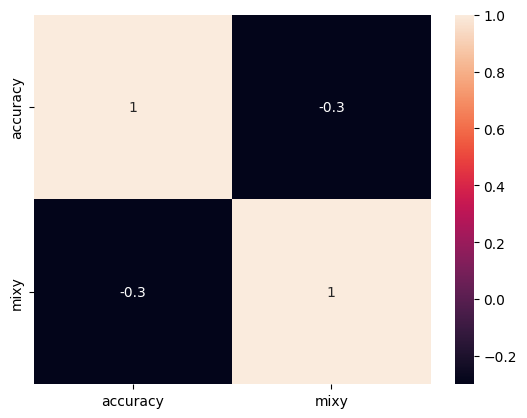

In [16]:
sns.heatmap(corr, annot = True)

plt.show()

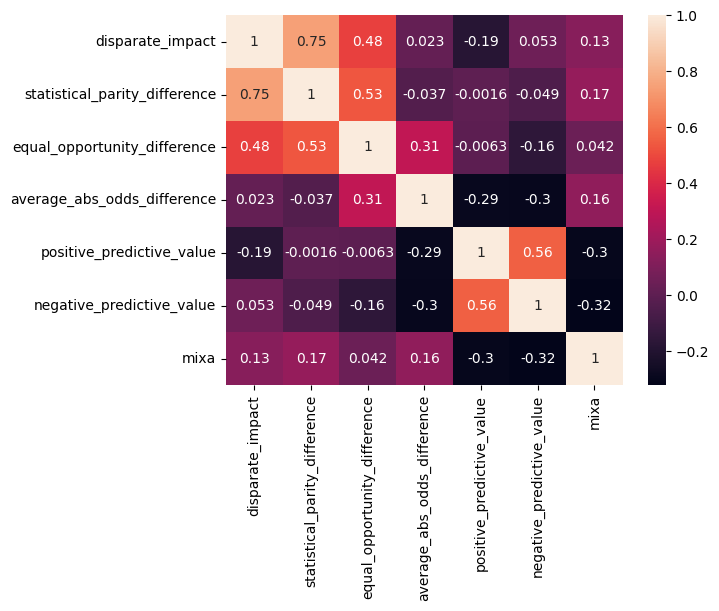

In [17]:

mixa_fair_df = new_df[['disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'average_abs_odds_difference','positive_predictive_value', 
                       'negative_predictive_value','mixa']]

corr = mixa_fair_df.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

